In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('Naive algorithm experiment.csv')
data_other = pd.read_csv('Naive algorithm experiment_other-data.csv')
data

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,naive_alg_steps,parameters_id,task_id
0,4,4,0.019126,22,21,0.002572,Beginner (9x9),11x11,True,NaN,True,0.0,3,3
1,2,2,0.023124,19,14,0.002721,Beginner (8x8),10x10,True,NaN,True,0.0,1,1
2,2,0,0.030742,25,15,0.004333,Beginner (8x8),10x10,True,NaN,False,0.0,2,2
3,2,1,0.034488,25,15,0.002890,Beginner (9x9),11x11,True,NaN,False,0.0,4,4
4,4,3,0.031873,29,26,0.005096,Beginner (8x8),10x10,True,NaN,True,1.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,3,0,0.940065,63,45,0.709282,Intermediate (16x16),18x18,True,NaN,False,7.0,62,14390
14396,4,3,0.675862,39,35,0.454375,Intermediate (16x16),18x18,True,NaN,True,NaN,69,14397
14397,2,0,0.948251,77,69,0.154250,Expert (16x30),18x32,True,NaN,True,7.0,63,14391
14398,3,0,0.796735,63,45,0.597085,Intermediate (16x16),18x18,True,NaN,False,NaN,70,14398


In [3]:
data_other

,sample_size,first_click_pos,num_games,verbose,visualise,agent_seed,run_seed,batch_size,num_processes
0,NaN,NaN,1000,False,False,50,5050,5,6


In [106]:
df = data.groupby('parameters_id').sum()[['wins', 'wins_without_guess', 'time_elapsed', 'samples_considered', 'samples_with_solutions', 'samples_solve_duration_total']]
df

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total
parameters_id,,,,,,
1,578,299,5.159318,5018,3537,0.840497
2,430,88,5.651149,5226,2513,0.780370
3,808,608,5.315474,4424,3691,0.691488
4,673,222,5.892837,4859,3007,0.638242
5,521,245,38.231716,10270,8381,3.717675
...,...,...,...,...,...,...
68,793,326,8.528062,4452,3081,3.557605
69,814,621,54.781807,8885,8348,21.583131
70,589,162,50.398966,8196,5974,20.543245


In [107]:
df2 = data.groupby('parameters_id').first()[['difficulty', 'sample_size', 'use_num_mines_constraint', 'first_click_pos', 'first_click_is_zero', 'naive_alg_steps']]
df2

,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,naive_alg_steps
parameters_id,,,,,,
1,Beginner (8x8),10x10,True,NaN,True,0.0
2,Beginner (8x8),10x10,True,NaN,False,0.0
3,Beginner (9x9),11x11,True,NaN,True,0.0
4,Beginner (9x9),11x11,True,NaN,False,0.0
5,Intermediate (16x16),18x18,True,NaN,True,0.0
...,...,...,...,...,...,...
68,Beginner (9x9),11x11,True,NaN,False,NaN
69,Intermediate (16x16),18x18,True,NaN,True,NaN
70,Intermediate (16x16),18x18,True,NaN,False,NaN


In [108]:
df3 = df.join(df2)
df3

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,naive_alg_steps
parameters_id,,,,,,,,,,,,
1,578,299,5.159318,5018,3537,0.840497,Beginner (8x8),10x10,True,NaN,True,0.0
2,430,88,5.651149,5226,2513,0.780370,Beginner (8x8),10x10,True,NaN,False,0.0
3,808,608,5.315474,4424,3691,0.691488,Beginner (9x9),11x11,True,NaN,True,0.0
4,673,222,5.892837,4859,3007,0.638242,Beginner (9x9),11x11,True,NaN,False,0.0
5,521,245,38.231716,10270,8381,3.717675,Intermediate (16x16),18x18,True,NaN,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68,793,326,8.528062,4452,3081,3.557605,Beginner (9x9),11x11,True,NaN,False,NaN
69,814,621,54.781807,8885,8348,21.583131,Intermediate (16x16),18x18,True,NaN,True,NaN
70,589,162,50.398966,8196,5974,20.543245,Intermediate (16x16),18x18,True,NaN,False,NaN


In [109]:
num_games = int(data_other['num_games'])
df3['win rate (%)'] = (df3['wins'] / num_games) * 100
df3['win rate without guess (%)'] = (df3['wins_without_guess'] / num_games) * 100
df3

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,naive_alg_steps,win rate (%),win rate without guess (%)
parameters_id,,,,,,,,,,,,,,
1,578,299,5.159318,5018,3537,0.840497,Beginner (8x8),10x10,True,NaN,True,0.0,57.8,29.9
2,430,88,5.651149,5226,2513,0.780370,Beginner (8x8),10x10,True,NaN,False,0.0,43.0,8.8
3,808,608,5.315474,4424,3691,0.691488,Beginner (9x9),11x11,True,NaN,True,0.0,80.8,60.8
4,673,222,5.892837,4859,3007,0.638242,Beginner (9x9),11x11,True,NaN,False,0.0,67.3,22.2
5,521,245,38.231716,10270,8381,3.717675,Intermediate (16x16),18x18,True,NaN,True,0.0,52.1,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,793,326,8.528062,4452,3081,3.557605,Beginner (9x9),11x11,True,NaN,False,NaN,79.3,32.6
69,814,621,54.781807,8885,8348,21.583131,Intermediate (16x16),18x18,True,NaN,True,NaN,81.4,62.1
70,589,162,50.398966,8196,5974,20.543245,Intermediate (16x16),18x18,True,NaN,False,NaN,58.9,16.2


# Analysis

In [110]:
sns.set_theme()

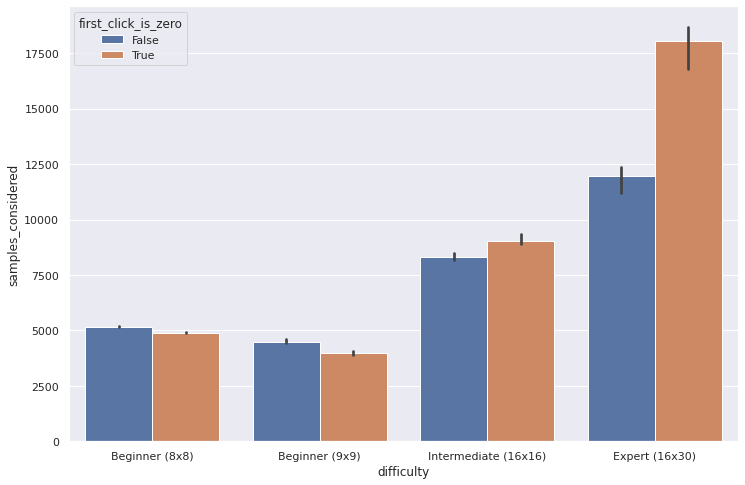

In [111]:
sns.barplot(x='difficulty', y='samples_considered', hue='first_click_is_zero', data=df3)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

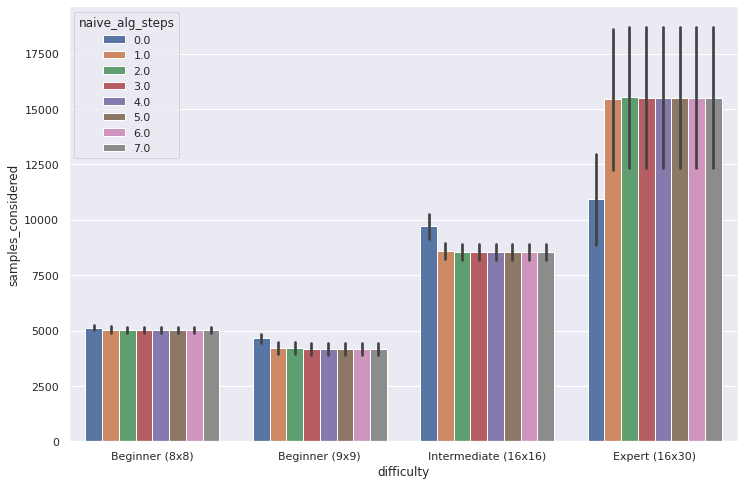

In [112]:
sns.barplot(x='difficulty', y='samples_considered', hue='naive_alg_steps', data=df3)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

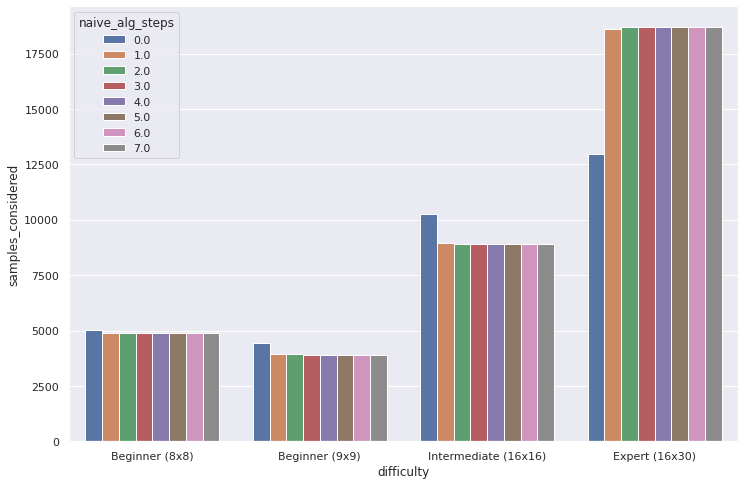

In [115]:
df4 = df3[df3['first_click_is_zero'] == True]
sns.barplot(x='difficulty', y='samples_considered', hue='naive_alg_steps', data=df4)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

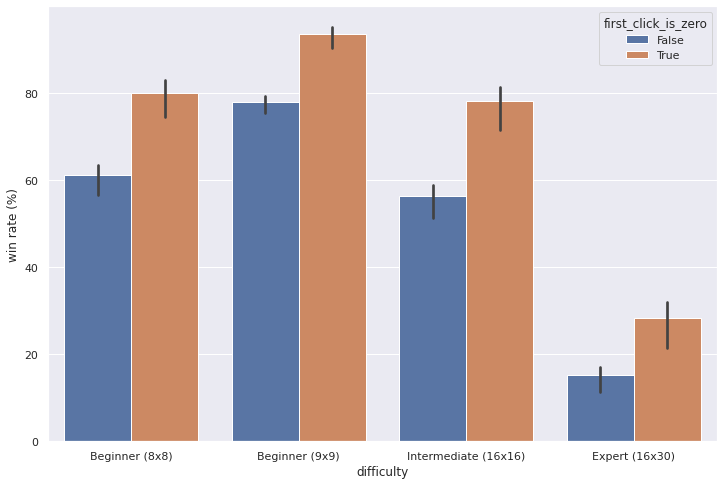

In [116]:
sns.barplot(x='difficulty', y='win rate (%)', hue='first_click_is_zero', data=df3)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

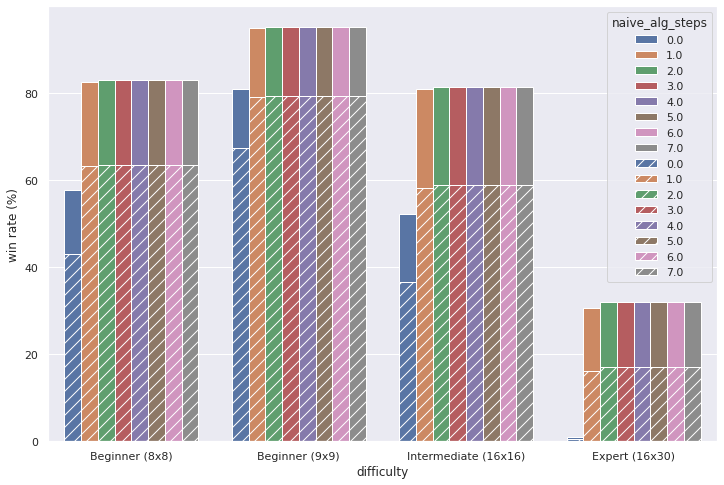

In [117]:
df4 = df3[df3['first_click_is_zero'] == True]
df5 = df3[df3['first_click_is_zero'] == False]

g = sns.barplot(x='difficulty', y='win rate (%)', hue='naive_alg_steps', data=df4, palette='deep')
# help(g)
sns.barplot(x='difficulty', y='win rate (%)', hue='naive_alg_steps', data=df5, palette='deep', hatch='//')
# plt.legend([],[], frameon=False)
fig = plt.gcf()
fig.set_size_inches(12, 8)
# plt.gca().legend(['red'])
plt.show()